**Assignment 10 - Google Play Store**

Author: Ana Tupa

Date: April 12, 2025

This script investigates the Google Play Store dataset, performs exploratory data analysis (EDA), and answers significant questions about the dataset, missing data handling, feature engineering, trends and strategic analysis was done.

In [453]:
# Libraries used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime
from datetime import datetime
import statsmodels.api as sm
from matplotlib_venn import venn3

 # Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?

  The dataset has 14 columns and 10,840 rows.

In [404]:
# Load the flight price dataset and examine its dimensions.
df=pd.read_csv('googleplaystore.csv')
df.shape

(10841, 14)



---
**Before answering the next questions, let’s take a moment to clean up our dataset!**


In [405]:
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [406]:
df.describe()

,Unnamed: 0,Rating
count,10841.000000,9367.000000
mean,5420.000000,4.193338
std,3129.671468,0.537431
min,0.000000,1.000000
25%,2710.000000,4.000000
50%,5420.000000,4.300000
75%,8130.000000,4.500000
max,10840.000000,19.000000


In [407]:
# Drop Redundant Columns
df.drop(columns=["Unnamed: 0"], inplace=True)

In [408]:
# Check data type
df.dtypes

,0
App,object
Category,object
Rating,float64
Reviews,object
Size,object
Installs,object
Type,object
Price,object
Content Rating,object
Genres,object


In [409]:
# Check for Missing Values
print(df.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


**Correcting formatting**

In [410]:
# Correcting formatting

# Convert 'Reviews' to integer
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Clean and Convert Size Column
def convert_size(size_str):
    if isinstance(size_str, str):  # Check if size_str is a string
        if "M" in size_str:
            return float(size_str.replace("M", ""))
        elif "k" in size_str:
            return float(size_str.replace("k", "")) / 1024
        else:
            return np.nan
    else:
        return size_str  # Return as is if not a string

df['Size_MB'] = df['Size'].replace("Varies with device", np.nan)
df['Size_MB'] = df['Size_MB'].apply(convert_size)

# Clean and Convert Installs Column
# Ensure the 'Installs' column is of type string before applying string methods
df['Installs'] = df['Installs'].astype(str)
df['Installs'] = df['Installs'].str.replace('+', '', regex=False).str.replace(',', '', regex=False)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

# Clean and Convert Price Column
df['Price'] = df['Price'].str.replace('$', '', regex=False)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Convert Last Updated to DateTime
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

In [411]:
# Check data type
df.dtypes

,0
App,object
Category,object
Rating,float64
Reviews,float64
Size,object
Installs,float64
Type,object
Price,float64
Content Rating,object
Genres,object


**Handle missing values:**

In [412]:
# Check for Missing Values Again
print(df.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              1
Size                 0
Installs             1
Type                 1
Price                1
Content Rating       1
Genres               0
Last Updated         1
Current Ver          8
Android Ver          3
Size_MB           1696
dtype: int64


In [413]:
# Get rows with missing values in specified columns
missing_row = df[df[['Reviews', 'Installs', 'Type', 'Price', 'Content Rating', 'Last Updated', 'Current Ver', 'Android Ver']].isnull().any(axis=1)]
print(missing_row)

                                           App             Category  Rating  Reviews                Size   Installs  Type  Price Content Rating             Genres Last Updated         Current Ver         Android Ver    Size_MB
15             Learn To Draw Kawaii Characters       ART_AND_DESIGN     3.2     55.0                2.7M     5000.0  Free   0.00       Everyone       Art & Design   2018-06-06                 NaN          4.2 and up   2.700000
1553                      Market Update Helper   LIBRARIES_AND_DEMO     4.1  20145.0                 11k  1000000.0  Free   0.00       Everyone   Libraries & Demo   2013-02-12                 NaN          1.5 and up   0.010742
4453                    [substratum] Vacuum: P      PERSONALIZATION     4.4    230.0                 11M     1000.0  Paid   1.49       Everyone    Personalization   2018-07-20                 4.4                 NaN  11.000000
4490                      Pi Dark [substratum]      PERSONALIZATION     4.5    189.0        

In [414]:
# Drop rows with too many critical nulls or corrupted data
# Get the index labels of rows to drop based on the condition
rows_to_drop = df[df[['Reviews', 'Installs', 'Type', 'Price', 'Content Rating', 'Last Updated', 'Current Ver', 'Android Ver']].isnull().any(axis=1)].index

# Drop the rows using the obtained index labels
df.drop(index=rows_to_drop, inplace=True)

# Safely fill missing values in non-critical fields
df['Current Ver'] = df['Current Ver'].fillna('Unknown')
df['Android Ver'] = df['Android Ver'].fillna('Unknown')

# Fill rating with the mean
mean_rating = round(df['Rating'].mean(), 1)  # e.g., 4.2
df['Rating'] = df['Rating'].fillna(mean_rating)

# Impute missing Size_MB with the mean value for each Category
df['Size_MB'] = df.groupby('Category')['Size_MB'].transform(lambda x: x.fillna(x.mean()))

# Check for Missing Values Again
print(df.isnull().sum())

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
Size_MB           0
dtype: int64


**Handle duplicates**

In [415]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 483


In [416]:
# Remove duplicates
df = df.drop_duplicates()

**Feature Engineering**

In [417]:
# Convert 'Last Updated' to datetime
df.loc[:, 'Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

# Extract year of last update
df.loc[:, 'Last_Updated_Year'] = df['Last Updated'].dt.year

<ipython-input-417-69d923675372>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Last_Updated_Year'] = df['Last Updated'].dt.year


**Validate Data Consistency**

In [418]:
df.describe()

,Rating,Reviews,Installs,Price,Last Updated,Size_MB,Last_Updated_Year
count,10346.000000,1.034600e+04,1.034600e+04,10346.000000,10346,10346.000000,10346.000000
mean,4.189658,4.063338e+05,1.417266e+07,1.031561,2017-11-14 14:51:45.200077312,21.052490,2017.383433
min,1.000000,0.000000e+00,0.000000e+00,0.000000,2010-05-21 00:00:00,0.008301,2010.000000
25%,4.100000,3.200000e+01,1.000000e+03,0.000000,2017-09-04 06:00:00,5.700000,2017.000000
50%,4.200000,1.688500e+03,1.000000e+05,0.000000,2018-05-20 00:00:00,14.000000,2018.000000
75%,4.500000,4.659825e+04,1.000000e+06,0.000000,2018-07-19 00:00:00,28.000000,2018.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000,2018-08-08 00:00:00,100.000000,2018.000000
std,0.484179,2.698179e+06,8.028090e+07,16.287252,NaN,21.114314,1.112255


In [419]:
# Type should be Free or Paid
print(df['Type'].unique())

['Free' 'Paid']


df.drop(columns=['Current Ver', 'Android Ver'], inplace=True)

**Outliers Detection**

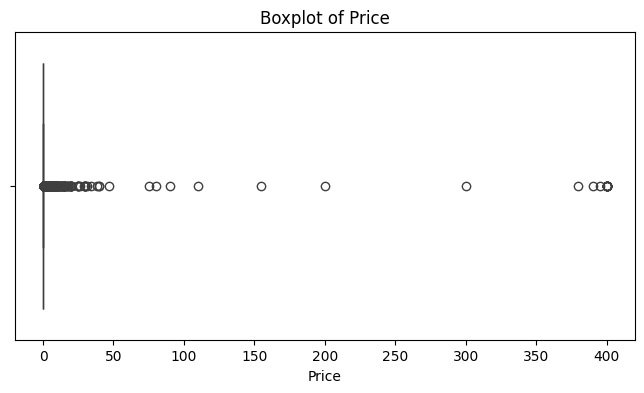

In [420]:
# Checking the outliers
features_to_check = ['Price']

for col in features_to_check:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [421]:
# Analyze the 'Price' column
df['Price'].value_counts().sort_index(ascending=True)


,count
Price,
0.00,9584
0.99,144
1.00,3
1.04,1
1.20,1
1.26,1
1.29,1
1.49,45
1.50,1


The Price column contains a gigantic percentage of zeros for free applications, and this totally skew the distribution to the right. The extreme right skew ruins the mean and standard deviation, and it is hard to make an honest assessment of price trends. A lot of free applications also obscure valuable information about paid applications because their pricing patterns are swamped. In order to serve this, it is recommended to separate the analysis of free apps and paid apps. Separating paid apps will enable you to clearly examine trends, changes, and pricing without being influenced by zero-valued entries.

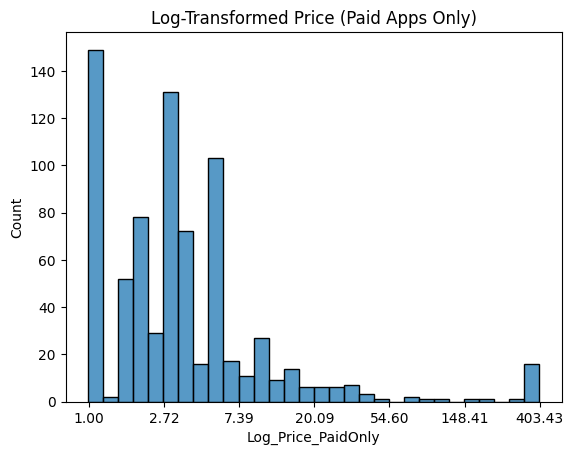

In [422]:
# Creating a new column
df['Price_PaidOnly'] = df['Price'].where(df['Type'] == 'Paid', np.nan)

df['Log_Price_PaidOnly'] = np.log(df['Price_PaidOnly'])

# Plotting the log-transformed Price (Paid Apps Only)
sns.histplot(df['Log_Price_PaidOnly'].dropna(), bins=30)

# Set the title
plt.title("Log-Transformed Price (Paid Apps Only)")

# Import FuncFormatter
from matplotlib.ticker import FuncFormatter

# Create a custom formatter for the x-axis
def log_transform_to_real(x, pos):
    """Convert log-transformed values back to original values for display."""
    return f'{np.exp(x):.2f}'  # Reverse the log transformation

# Apply the custom formatter to the x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(log_transform_to_real))

# Show the plot
plt.show()

**Encoding Categorical Variables**

In [423]:
unique_Content_Rating = df['Content Rating'].unique()

print("Unique Content Rating:", unique_Content_Rating)

# One-hot encode 'Category', 'Genres', 'Content Rating'
#df = pd.get_dummies(df, columns=['Content Rating'], drop_first=True)

Unique Content Rating: ['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated']


# Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.

  Overall, app ratings across categories tend to fall within a relatively narrow range, typically between 3.8 and 4.6,  indicating user ratings of applications tend to be quite high, regardless of the category. That the Video Player category is one with the least average rating stands out, clustering at 4.4 and with lots more below, to suggest there may be user unrest in this market segment. On the other hand, the Art & Design category possesses one of the highest average ratings, approximately 4.4, and consists predominantly of ratings between 4.2 and 4.6. Additionally, while most of the ratings are clustered on the higher side, outliers, primarily on the lower side, are present in most categories, indicating the existence of poorly rated applications even in largely well-rated groups.

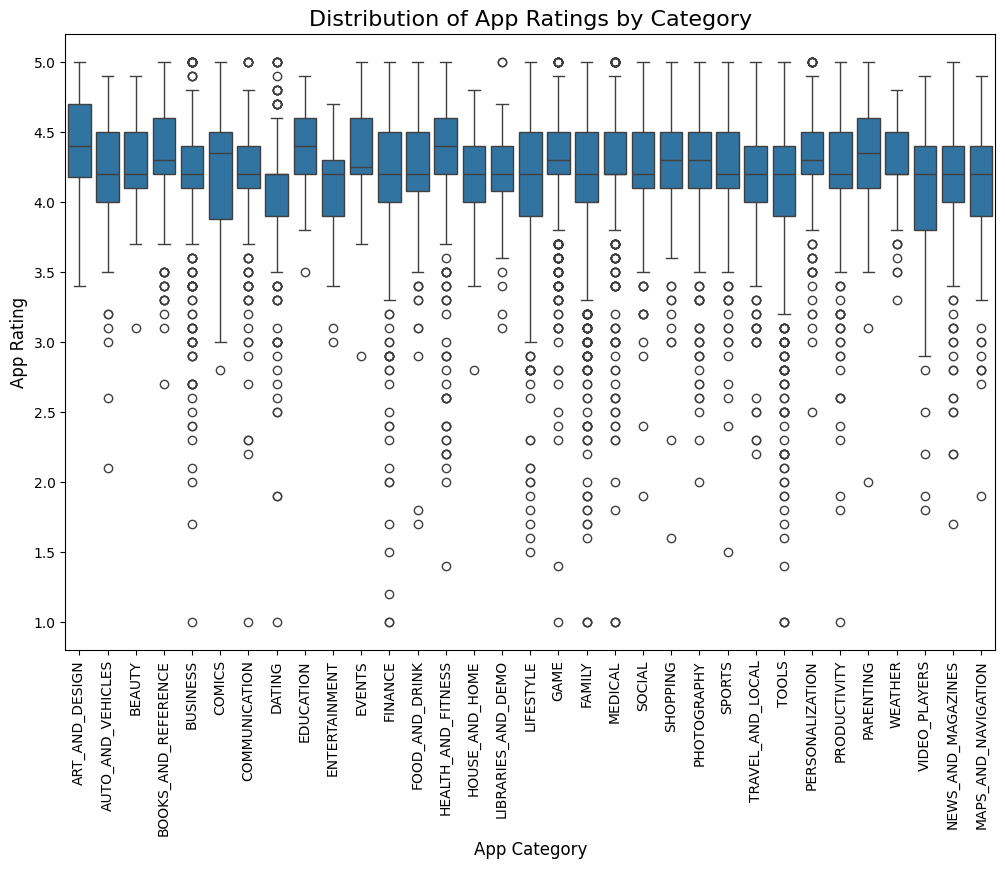

In [424]:
# Plot the rating and category
plt.figure(figsize=(12, 8))

# Create a boxplot to compare the ratings of different app categories
sns.boxplot(x='Category', y='Rating', data=df)

# Set the title and labels
plt.title('Distribution of App Ratings by Category', fontsize=16)
plt.xlabel('App Category', fontsize=12)
plt.ylabel('App Rating', fontsize=12)

# Rotate x labels for better readability if needed
plt.xticks(rotation=90)

# Show the plot
plt.show()

# Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.

Upon review of the dataset, there are some columns that contain missing values to be appropriately processed depending on how important they are to the analysis.
* Rating column contains 1,474 missing values and it is vital in questions Q10 and Q12, it has to be filled with the mean.
* All of the Reviews, Installs, and Last Updated fields contain a missing value only once, so deleting the single rows for these columns is reasonable, especially since Installs and Last Updated are necessary for Q14 and Q17 respectively.
* In Type, Price, and Content Rating, with one missing value each, deletion or imputation is acceptable; these are critical to Q13 and may have impact on categorical analysis.
* The Current Ver and Android Ver columns both contain a few missing values (8 and 3 respectively) and are not included directly in today's questions so could be excluded or filled in with something like "Unknown."
* Lastly, the Size_MB column contains 1,696 missing values but will be needed for Q12 so should be included for the present and it has to be filled with the mean value for each Category.

# Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship.

  Interestingly, there is no strong correlation between app size and user rating, larger apps are not more highly rated than smaller ones. Highly rated apps (around 4.5 to 5 stars) exist across all size ranges, suggesting that users value more than app size. This implies that developers may be best off optimizing for quality and user experience rather than just size. Overall, while app size and number of reviews provide context, they don't necessarily determine user satisfaction, supporting the compound nature of what makes a successful app.

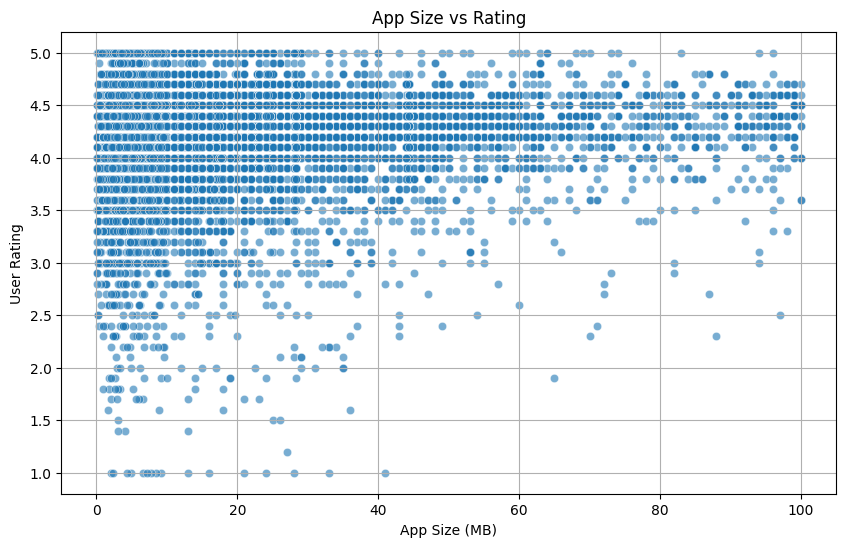

In [425]:
df_rating_size = df[['Size_MB', 'Rating']].dropna()
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_rating_size, x='Size_MB', y='Rating', alpha=0.6)
plt.title('App Size vs Rating')
plt.xlabel('App Size (MB)')
plt.ylabel('User Rating')
plt.grid(True)
plt.show()

# Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.
  To investigate the way prices vary across categories of apps, attention was limited to categories that contain at least one paid app. Categories comprised solely of free apps were automatically removed because they contain no price variation and therefore contribute nothing informative to the analysis. By screening in this way, the resulting chart displays average prices only for categories with paid apps, ensuring fair and accurate comparison free from the influence of the sheer multitude of free apps. By filtering this way, the Beauty, Comics, and House & Home categories were eliminated—not because they don't matter, but simply because they have no price fluctuation, and hence cannot assist in answering the question of how app prices fluctuate by category.

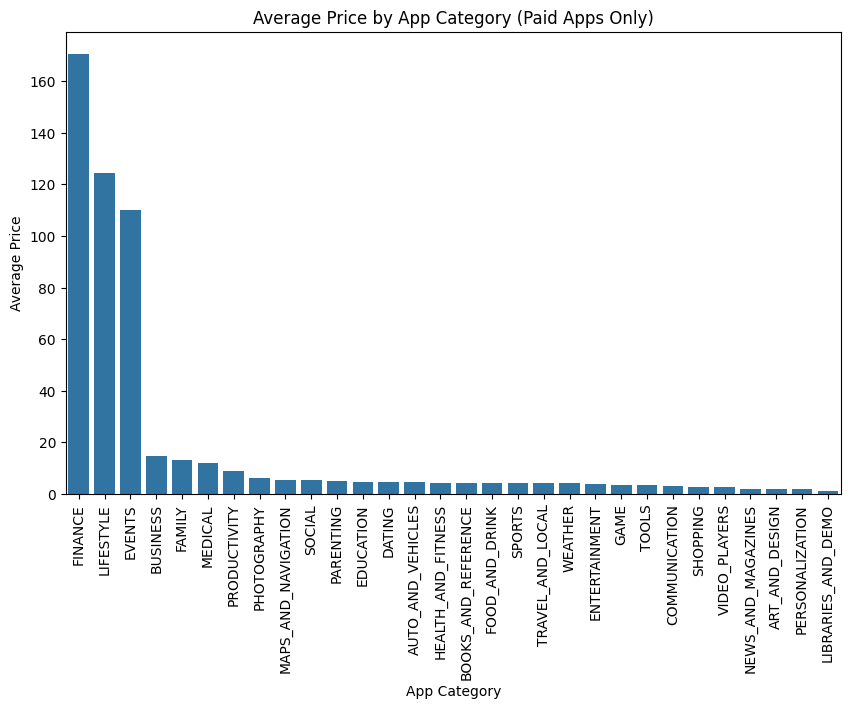

In [426]:
# Grouping by app type and calculating the average price for paid apps only
avg_price_by_type = df[df['Type'] == 'Paid'].groupby('Category')['Price'].mean()

# Plotting the bar chart
import seaborn as sns
import matplotlib.pyplot as plt

# Sorting for better visualization
avg_price_by_type = avg_price_by_type.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_by_type.index, y=avg_price_by_type.values)
plt.title("Average Price by App Category (Paid Apps Only)")
plt.xlabel("App Category")
plt.ylabel("Average Price")
plt.xticks(rotation=90)  # Rotate category labels for better readability
plt.show()

In [427]:
# All categories in the dataset
all_categories = set(df['Category'].unique())

# Categories that appear in the Paid Apps Only dataset
# Filter by 'Is_Free' column to get paid apps
paid_categories = set(df[df['Type'] == 'Paid']['Category'].unique())

# Categories that are only free apps
free_only_categories = all_categories - paid_categories

# Display the result
print("Categories that only have free apps (not shown in price plot):")
for category in sorted(free_only_categories):
    print("-", category)

Categories that only have free apps (not shown in price plot):
- BEAUTY
- COMICS
- HOUSE_AND_HOME


# Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps with the highest number of installs.


In [469]:
# Convert 'Installs' to numeric, replace commas, and handle errors by coercing non-numeric values to NaN
top_10_apps['Installs'] = pd.to_numeric(top_10_apps['Installs'].str.replace(',', '').str.replace('+', '').str.replace('Free', ''), errors='coerce')

# Apply the formatting for thousands separators
top_10_apps['Installs'] = top_10_apps['Installs'].apply(lambda x: f"{int(x):,}" if pd.notnull(x) else 'NaN')

# Display the table
top_10_apps.reset_index(drop=True, inplace=True)
top_10_apps

,App,Installs
0,Google Photos,"1,000,000,000"
1,Google Drive,"1,000,000,000"
2,Maps - Navigate & Explore,"1,000,000,000"
3,Hangouts,"1,000,000,000"
4,Google,"1,000,000,000"
5,Google News,"1,000,000,000"
6,Google Street View,"1,000,000,000"
7,Subway Surfers,"1,000,000,000"
8,Google+,"1,000,000,000"
9,Gmail,"1,000,000,000"


# Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories. How would you approach this task, and what features would you analyze to make recommendations to the company?

  To identify the most trending categories of apps in Google Play Store, I would track key performance indicators such as installs volume, user rating, review volume, and pricing trends across categories. These metrics put together indicate user interest and engagement. Following the ranking of each category on the basis of its frequency in these indicators, categories like GAME and SOCIAL are the top performers, being ranked at the top in all four aspects being highly recommended choices for a new app launch. Categories like FAMILY, PHOTOGRAPHY, and PRODUCTIVITY are also among the top performers, especially in terms of installs and user engagement. By focusing on these top-performing categories, the company can then position their new app strategically in locations with demonstrated demand from consumers and competitive responses.

In [450]:
# Creating the Tops
top_installs = df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)
top_ratings = df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)
top_reviews = df.groupby('Category')['Reviews'].sum().sort_values(ascending=False).head(10)
category_price_summary = df[df['Type'] == 'Paid'].groupby('Category')['Price'].mean().sort_values(ascending=False)

# Combine all unique top categories
# price_summary_categories is already an Index, no need to access .index again
all_top_categories = set(top_installs.index) | set(top_ratings.index) | set(top_reviews.index) | set(price_summary_categories)

# Create the comparison DataFrame
comparison_df = pd.DataFrame(index=sorted(all_top_categories))
comparison_df.index.name = 'Category'

# Now correctly use pd.Series to map values
comparison_df['Top Installs'] = pd.Series(comparison_df.index.isin(top_installs.index), index=comparison_df.index).map({True: '✓', False: ''})
comparison_df['Top Ratings'] = pd.Series(comparison_df.index.isin(top_ratings.index), index=comparison_df.index).map({True: '✓', False: ''})
comparison_df['Top Reviews'] = pd.Series(comparison_df.index.isin(top_reviews.index), index=comparison_df.index).map({True: '✓', False: ''})
comparison_df['In Price Summary'] = pd.Series(comparison_df.index.isin(category_price_summary.index), index=comparison_df.index).map({True: '✓', False: ''}) # Use category_price_summary.index

# Optional: Add a score column (e.g., 1 point per checkmark)
comparison_df['Score'] = comparison_df[['Top Installs', 'Top Ratings', 'Top Reviews', 'In Price Summary']].apply(lambda row: row.eq('✓').sum(), axis=1)

comparison_df.sort_values(by='Score', ascending=False, inplace=True)

comparison_df


,Top Installs,Top Ratings,Top Reviews,In Price Summary,Score
Category,,,,,
GAME,✓,✓,✓,✓,4
SOCIAL,✓,✓,✓,✓,4
FAMILY,✓,,✓,✓,3
PHOTOGRAPHY,✓,,✓,✓,3
PRODUCTIVITY,✓,,✓,✓,3
PERSONALIZATION,,✓,✓,✓,3
COMMUNICATION,✓,,✓,✓,3
VIDEO_PLAYERS,✓,,✓,✓,3
TOOLS,✓,,✓,✓,3


# Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the most successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

  In order to identify the most successful Google Play app developers, one would need to analyze metrics like installs, ratings, reviews, and update frequency, as well as category, price model, and content rating. Even without a Developer column, sorting top apps and looking at naming patterns can be used to deduce developer success.

For visuals, a Venn diagram offers a useful way to highlight apps or categories that are successful in more than one metric (installs, ratings, reviews). This can be used together with a treemap or stacked bar chart to show install share or revenue models by category to make the information visually interesting and easy to understand.

In [457]:
!pip install matplotlib-venn

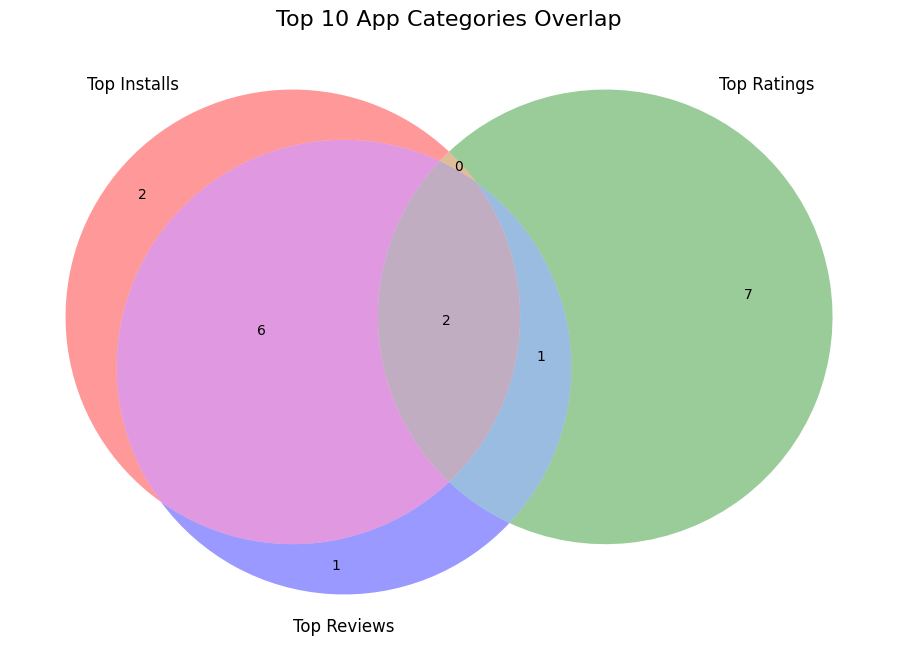

In [463]:
# Example category sets from your top DataFrames
# Get the top 10 categories for each metric
top_installs = df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10).index.tolist()
top_ratings = df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10).index.tolist()
top_reviews = df.groupby('Category')['Reviews'].sum().sort_values(ascending=False).head(10).index.tolist()

# Create the Venn diagram using sets
plt.figure(figsize=(12, 8))  # Increased figure size for better readability
v = venn3([set(top_installs), set(top_ratings), set(top_reviews)],
          set_labels=('Top Installs', 'Top Ratings', 'Top Reviews'))

# Add category names to the diagram
for subset in v.subset_labels:
    if subset:
        # Get the category names in the subset
        categories = [cat for cat in subset.get_text().split(',') if cat]

        # Format the category names for better display
        formatted_categories = '\n'.join(categories)

        # Update the subset label with the formatted category names
        subset.set_text(formatted_categories)

plt.title('Top 10 App Categories Overlap', fontsize=16)
plt.show()

# Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to launch a new app. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

  "Based on trends seen, there is a large spike in average installs and reviews during August, particularly for the Communication, Video Players, Photography, and Productivity types. July also has a high volume of activity for Social and Communication apps. Therefore, releasing consumer-oriented apps during July or August is recommended to gain optimum visibility and activity."

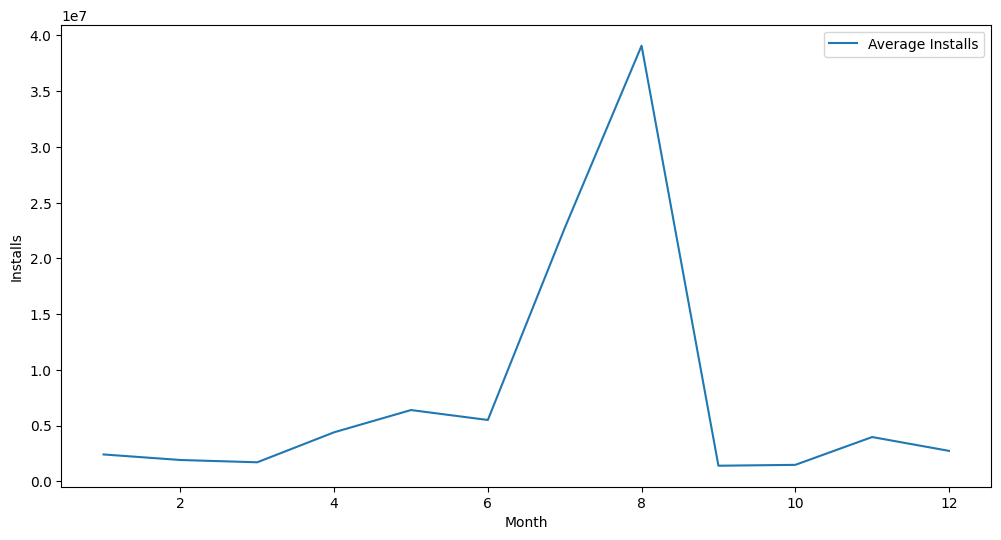

In [464]:
# Extracting the month and day for 'Last Updated'
df['Month'] = df['Last Updated'].dt.month
df['Year'] = df['Last Updated'].dt.year

#Group and Aggregate
monthly_summary = df.groupby('Month').agg({
    'Installs': 'mean',
    'Rating': 'mean',
    'Reviews': 'mean'
}).reset_index()

#Visualize Trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Installs', data=monthly_summary, label='Average Installs')
plt.show()


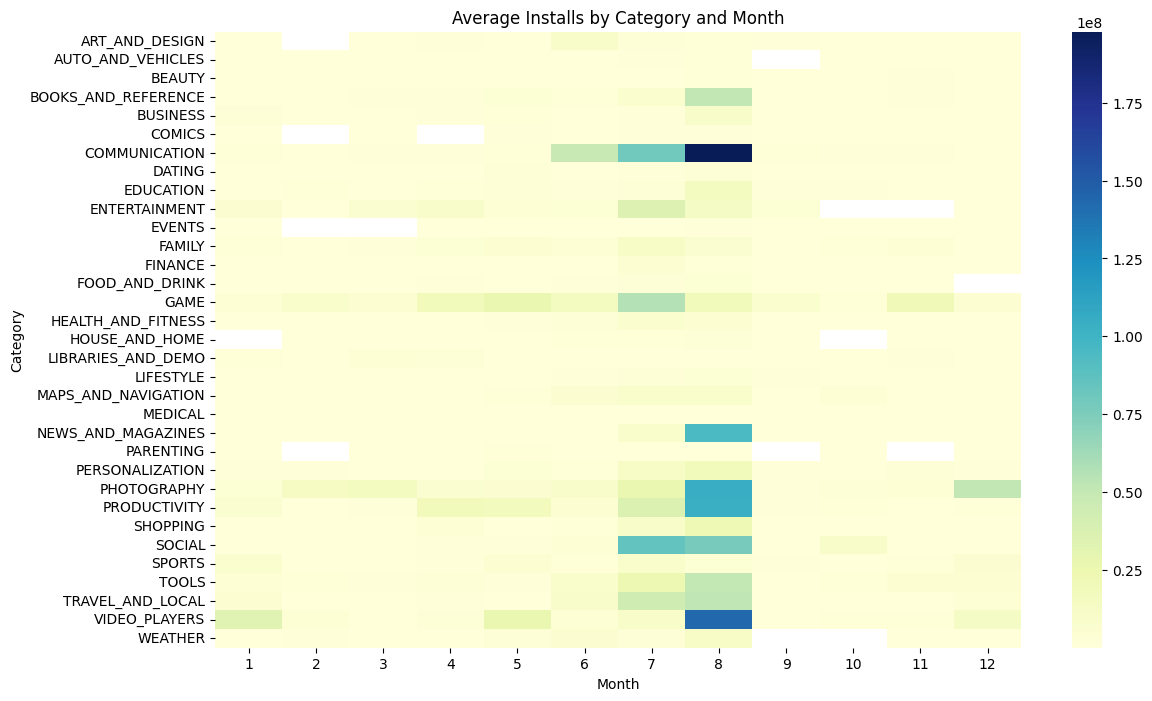

In [468]:
# Grouping by Category and Month
plt.figure(figsize=(13, 8))
category_month = df.groupby(['Category', 'Month'])['Installs'].mean().unstack()
sns.heatmap(category_month, cmap='YlGnBu')
plt.title('Average Installs by Category and Month')
plt.show()
#